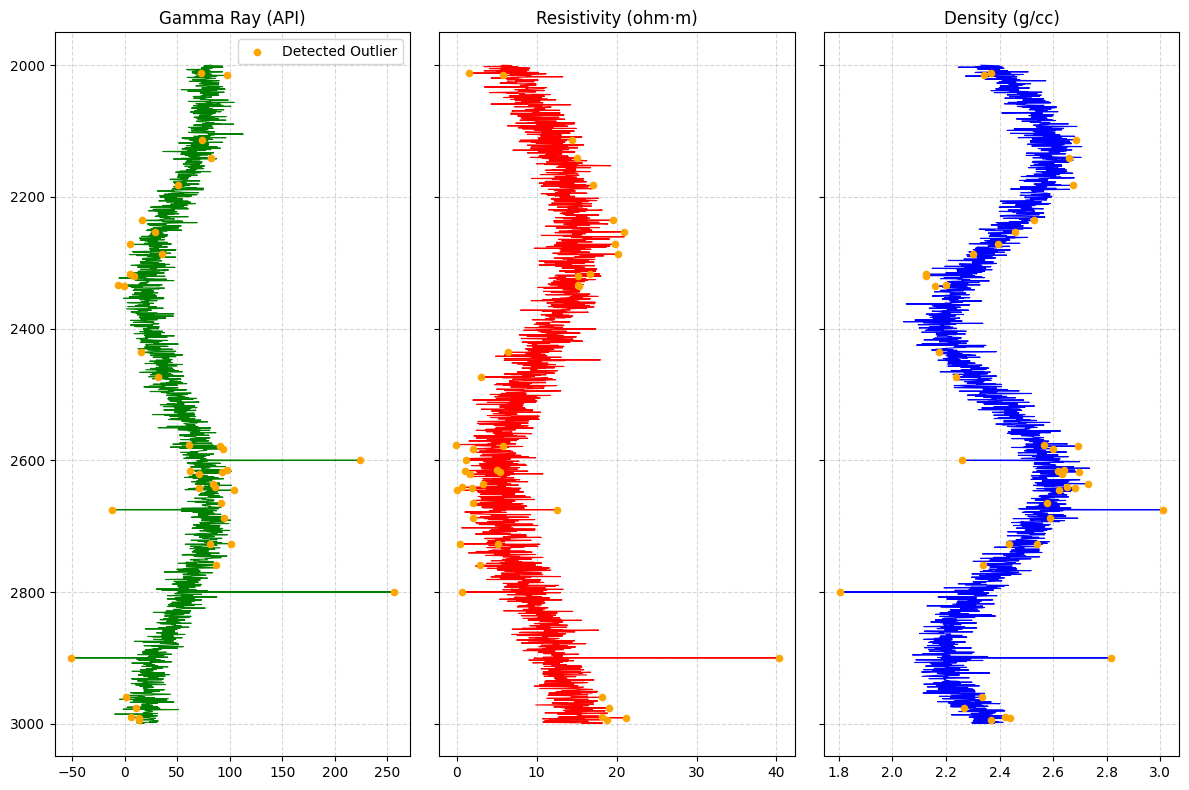

Detected 40 anomalous samples out of 2000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate realistic well log data
np.random.seed(42)
depth = np.arange(2000, 3000, 0.5)  # 1000 ft interval
n = len(depth)

# Normal log behavior
gr = 50 + 30 * np.sin(depth / 100) + np.random.normal(0, 10, n)
resistivity = 10 + 5 * np.cos(depth / 120) + np.random.normal(0, 2, n)
density = 2.4 + 0.2 * np.sin(depth / 80) + np.random.normal(0, 0.05, n)

# Inject artificial anomalies (bad hole, spikes, etc.)
anomaly_idx = [1200, 1350, 1600, 1800]
gr[anomaly_idx] += np.array([150, -80, 200, -100])
resistivity[anomaly_idx] *= np.array([0.2, 3.0, 0.1, 4.0])
density[anomaly_idx] += np.array([-0.3, 0.4, -0.5, 0.6])

# Combine into feature matrix
X = np.column_stack((gr, resistivity, density))

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
anomaly_labels = iso_forest.fit_predict(X)  # -1 = outlier, 1 = normal

# Plot logs with anomalies highlighted
fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
logs = [gr, resistivity, density]
names = ['Gamma Ray (API)', 'Resistivity (ohm·m)', 'Density (g/cc)']
colors = ['green', 'red', 'blue']

for i, (log, name, color) in enumerate(zip(logs, names, colors)):
    axes[i].plot(log, depth, color=color, linewidth=0.8)
    axes[i].set_title(name)
    axes[i].invert_yaxis()
    axes[i].grid(True, ls='--', alpha=0.5)

    # Highlight anomalies
    anomaly_depths = depth[anomaly_labels == -1]
    anomaly_vals = log[anomaly_labels == -1]
    axes[i].scatter(anomaly_vals, anomaly_depths,
                    color='orange', s=20, zorder=5, label='Detected Outlier')

    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.savefig('isolation_forest_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Detected {np.sum(anomaly_labels == -1)} anomalous samples out of {n}")